In [ ]:
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
from datetime import date

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/BTC-USD.csv')

In [ ]:
from datetime import date
d0 = date(2021, 6, 1)
x = date(2021, 6, 7)

In [ ]:
delta = x - d0
x=delta.days
print(x)

6


In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-10-01,387.427002,391.378998,380.779999,383.614990,383.614990,26229400.0
1,2014-10-02,383.988007,385.497009,372.946014,375.071991,375.071991,21777700.0
2,2014-10-03,375.181000,377.695007,357.859009,359.511993,359.511993,30901200.0
3,2014-10-04,359.891998,364.487000,325.885986,328.865997,328.865997,47236500.0
4,2014-10-05,328.915985,341.800995,289.295990,320.510010,320.510010,83308096.0


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2431,2021-05-28,38507.082031,38856.968750,34779.039063,35697.605469,35697.605469,5.520019e+10
2432,2021-05-29,35684.156250,37234.500000,33693.929688,34616.066406,34616.066406,4.523101e+10
2433,2021-05-30,34607.406250,36400.667969,33520.738281,35678.128906,35678.128906,3.164608e+10
2434,2021-05-31,35658.593750,37468.250000,34241.945313,37332.855469,37332.855469,3.900985e+10
2435,2021-06-01,37594.101563,37830.679688,35787.085938,36157.773438,36157.773438,3.428866e+10


In [ ]:
print(df.isna().sum())

Date         0
Open         4
High         4
Low          4
Close        4
Adj Close    4
Volume       4
dtype: int64


In [ ]:
df = df.dropna()

In [ ]:
print('total missing values : ' + str(df.isna().sum().sum()))

total missing values : 0


In [ ]:
df1=df.reset_index()['Close']

In [ ]:
df1

0         383.614990
1         375.071991
2         359.511993
3         328.865997
4         320.510010
            ...     
2427    35697.605469
2428    34616.066406
2429    35678.128906
2430    37332.855469
2431    36157.773438
Name: Close, Length: 2432, dtype: float64

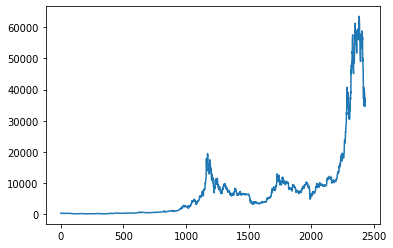

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)
plt.savefig('bit.png')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
print(df1)

[[0.00324534]
 [0.00311043]
 [0.00286471]
 ...
 [0.56059735]
 [0.58672791]
 [0.56817164]]


In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(1580, 852)

In [ ]:
train_data

array([[0.00324534],
       [0.00311043],
       [0.00286471],
       ...,
       [0.05403306],
       [0.05407561],
       [0.05378356]])

In [ ]:

# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
#reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(1479, 100)
(1479,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(751, 100)
(751,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.layers import LSTM,Bidirectional

In [ ]:
model=Sequential()

model.add(Bidirectional(LSTM(50, return_sequences=True), input_shape=(100, 1)))
model.add(Dropout(0.5))

model.add(Bidirectional(LSTM(50, return_sequences=True)))
model.add(Dropout(0.5))

model.add(Bidirectional(LSTM(50)))

model.add(Dropout(0.5))

model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='Adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 100, 100)          20800     
_________________________________________________________________
dropout (Dropout)            (None, 100, 100)          0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 100, 100)          60400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 100)          0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 100)               60400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 100, 100)          20800     
_________________________________________________________________
dropout (Dropout)            (None, 100, 100)          0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 100, 100)          60400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 100)          0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 100)               60400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1

In [ ]:
from keras.callbacks import ModelCheckpoint
checkp = ModelCheckpoint('./bit_model_bidirectional.h5', monitor = 'val_loss', save_best_only = True, verbose = 1)

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1,callbacks = [checkp])

Epoch 1/100
24/24 [==============================] - 16s 120ms/step - loss: 0.0010 - val_loss: 0.0028

Epoch 00001: val_loss improved from inf to 0.00282, saving model to ./bit_model_bidirectional.h5
Epoch 2/100
24/24 [==============================] - 1s 34ms/step - loss: 3.6016e-04 - val_loss: 0.0017

Epoch 00002: val_loss improved from 0.00282 to 0.00171, saving model to ./bit_model_bidirectional.h5
Epoch 3/100
24/24 [==============================] - 1s 32ms/step - loss: 3.0020e-04 - val_loss: 0.0021

Epoch 00003: val_loss did not improve from 0.00171
Epoch 4/100
24/24 [==============================] - 1s 32ms/step - loss: 2.7885e-04 - val_loss: 0.0045

Epoch 00004: val_loss did not improve from 0.00171
Epoch 5/100
24/24 [==============================] - 1s 32ms/step - loss: 2.8388e-04 - val_loss: 0.0048

Epoch 00005: val_loss did not improve from 0.00171
Epoch 6/100
24/24 [==============================] - 1s 33ms/step - loss: 2.2942e-04 - val_loss: 0.0016

Epoch 00006: val_loss

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.5.0'

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

4714.474900090296

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

22116.94376708231

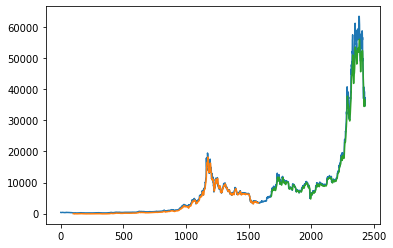

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)

plt.savefig('test_train.png')

In [ ]:
len(test_data)

852

In [ ]:
x_input=test_data[752:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.8532003988006319,
 0.7681966177067296,
 0.7821074163660949,
 0.7408683185696914,
 0.7289601365231273,
 0.726570752424007,
 0.7099789210789208,
 0.7809374293343568,
 0.7611625078024906,
 0.795260286487481,
 0.7640393916475015,
 0.7698212261841613,
 0.7695855879437183,
 0.8058160777372403,
 0.8222365470399733,
 0.8629405239749631,
 0.8816444635117885,
 0.9100149375565988,
 0.90254508196375,
 0.9643054329899778,
 0.9336578422799758,
 0.88004397404677,
 0.8942200199401418,
 0.9268450596026241,
 0.9108645306117138,
 0.9185665083809679,
 0.9180452667155475,
 0.905566494696749,
 0.8582824741069492,
 0.8615955354423405,
 0.8305703683829484,
 0.8136718372128668,
 0.867886336229433,
 0.8810911454524664,
 0.8807316429222827,
 0.9091476407868008,
 0.9275840507336468,
 0.9276020628713979,
 0.9303967817592702,
 0.9349526805836983,
 0.9068372140038498,
 0.9250710491021904,
 0.9297978164857456,
 0.9161299966337589,
 0.882282228900014,
 0.9182080544986916,
 0.9169613308095098,
 0.9414101553382878,
 

In [ ]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.5467698]
101
1 day input [0.76819662 0.78210742 0.74086832 0.72896014 0.72657075 0.70997892
 0.78093743 0.76116251 0.79526029 0.76403939 0.76982123 0.76958559
 0.80581608 0.82223655 0.86294052 0.88164446 0.91001494 0.90254508
 0.96430543 0.93365784 0.88004397 0.89422002 0.92684506 0.91086453
 0.91856651 0.91804527 0.90556649 0.85828247 0.86159554 0.83057037
 0.81367184 0.86788634 0.88109115 0.88073164 0.90914764 0.92758405
 0.92760206 0.93039678 0.93495268 0.90683721 0.92507105 0.92979782
 0.91613    0.88228223 0.91820805 0.91696133 0.94141016 0.94791198
 0.94299276 1.         0.99378193 0.99700838 0.96951193 0.95547381
 0.88492329 0.87715518 0.88897929 0.84844353 0.81458953 0.80403103
 0.78756392 0.77103637 0.85027003 0.86624094 0.86294978 0.84290103
 0.90914727 0.91037703 0.89147508 0.90046382 0.83940211 0.9039966
 0.887771   0.90292901 0.92578518 0.91676098 0.87929542 0.89263569
 0.77334636 0.7822789  0.78487413 0.73559927 0.73079663 0.68470851
 0.67478974 0.58151019 0.64120661 0

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
day_pred

array([101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130])

In [ ]:
j=scaler.inverse_transform(lst_output)

g=[]

 

from datetime import timedelta, datetime

date = datetime(2021,6,1)

for i in range(30):

    date += timedelta(days=1)

    g.append(datetime.date(date))

 

c=pd.DataFrame(g)

 

c['Forecasted']=pd.DataFrame(j)

c=c.rename(columns={0: 'Date', 'Forecasted': 'Close'})

c.to_csv(r'/content/drive/MyDrive/forecasted_prices_v1.csv', index=True)

In [ ]:

len(df1)

2432

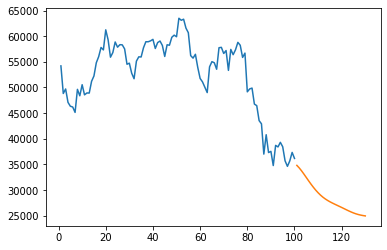

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[2332:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.savefig('predictions.png')

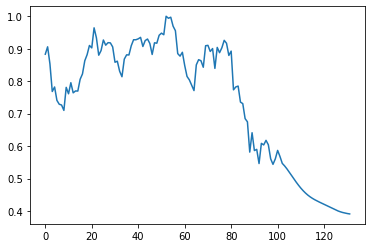

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[2330:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

In [ ]:
len(df3)

2462

In [ ]:
df3

[[383.61499],
 [375.071991],
 [359.511993],
 [328.865997],
 [320.51001],
 [330.07901],
 [336.18701200000004],
 [352.940002],
 [365.02600099999995],
 [361.56201200000004],
 [362.299011],
 [378.549011],
 [390.414001],
 [400.869995],
 [394.77301],
 [382.556],
 [383.757996],
 [391.441986],
 [389.54599],
 [382.84500099999997],
 [386.475006],
 [383.15799],
 [358.416992],
 [358.34500099999997],
 [347.27099599999997],
 [354.70401],
 [352.989014],
 [357.61801099999997],
 [335.591003],
 [345.304993],
 [338.321014],
 [325.74899300000004],
 [325.891998],
 [327.553986],
 [330.492004],
 [339.485992],
 [349.290009],
 [342.415009],
 [345.488007],
 [363.264008],
 [366.924011],
 [367.695007],
 [423.56100499999997],
 [420.73498499999994],
 [397.817993],
 [376.132996],
 [387.88198900000003],
 [387.40799],
 [375.197998],
 [380.554993],
 [357.839996],
 [350.847992],
 [352.920013],
 [367.572998],
 [376.90100099999995],
 [375.347992],
 [368.369995],
 [369.670013],
 [376.446991],
 [375.490997],
 [378.046997000

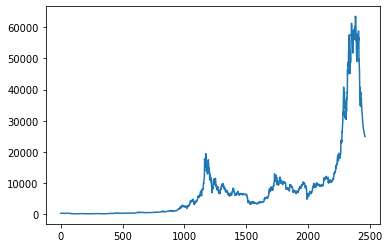

In [ ]:
plt.plot(df3)

In [ ]:
df3[2431+x]

[31780.844962993564]

In [ ]:
import csv

In [ ]:
import csv

with open('prices.csv', 'w', newline='') as file:
    fieldnames = ['bitcoin_price']
    writer = csv.DictWriter(file, fieldnames=fieldnames)
    for i in range(2460):

      writer.writeheader()
      writer.writerow({'bitcoin_price': df3[i]})

In [ ]:
# name of csv file 
filename = "bitcoin_prices.csv"
fields = ['bitcoin_price']
    
# writing to csv file 
with open(filename, 'w') as csvfile: 
    # creating a csv writer object 
    csvwriter = csv.writer(csvfile)
     
        
    # writing the fields 
     
        
    # writing the data rows
    


    csvwriter.writerows(df3)